# Notation for linear regression models

In [1]:
# import numerical and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Load library to display values in notebook.
from jupyprint import jupyprint, arraytex
# only show 6 decimals when printing
np.set_printoptions(precision=6)
import scipy.stats as sps

This page starts with the model for simple linear regression, that you have already
seen in the [regression page](https://lisds.github.io/textbook/mean-slopes/finding_lines.html).

Our purpose is to introduce the *mathematical notation* for linear regression models.
Whilst a subset of readers might be excited by this proposition, to others
the subject might sound complicated and unnecessary. We would like to demonstrate
why this is not the case.

This mathematical notation frequently appears in research papers and in other sources
about regression analysis, and it is important to understand it. This notation
makes it easy to describe different regression models in a concise way, which is 
useful for assessing which model best fits your data. It will also allow you to
communicate easily with other data scientists about the models you are fitting.
By teaching this notation via python code which you already understand, we aim to
make the notation clear and digestible. 

*Note*: it is very likely this page will be challenging. Do not worry if you do
not understand some of the notation the first time you see it. In fact, we would
be surprised if you did. You may need to revisit certain sections several times -
but please rest assured that with perseverance things will make sense.

We believe that it is easier to understand statistical techniques when you know clearly
what their purpose is - when you would use them, and why. With this in mind we will now
briefly explain the purpose of statistical modelling, of which linear regression is one type.

The typical situation in data science is this: we would like to answer a question about
how the world works. This question typically regards a set of **observational units** -
these might be people, city districts, cows, rivers, continents, molecules etc. Each *single*
observational unit has characteristics which vary when we compare *different* observational units
(we call these characteristics **variables**). 

For instance, if our research question was "are people who are taller generally
heavier?" then our observational units are *people*, and the variables we are interested
in are *height* and *weight*. Our dataset would be a collection of measurements
of these variables from a specific group of people. Each individual person in our dataset
has a height and a weight, and these values vary when we compare across different people. (We
can refer to each individual's height or weight as a *score* on that variable - typically, each observational
unit has a score on each variable in the dataset).

Once we have our dataset, regression modelling has two key purposes:

- description: precisely quantifying the relationships between the variables in our dataset (in other words, describing the relationships numerically). This is also called *fitting a model*.

- prediction: using our model's description of the relationships between the variables in our dataset to make predictions about *new* datasets which contain different observational units with the same variables

For instance, a finance company might fit a model to a dataset containing information
about customer characteristics and whether or not each customer defaulted on loan repayments.
This model gives a mathematical *description* of the relationships between the variables in
the dataset (e.g. customer characteristics, like age, income, job type, etc.), and whether or
not they defaulted on loan repayments. The company might then use this model to make
*predictions* about new customers, to estimate how likely they are to default on loan
repayments in the future, given their score on these variables.

Now we are armed with some more context about the purpose of linear regression, we will introduce the mathematical notation via a historical social science dataset, to which we now turn our attention.


## Doing a good job

Duncan {cite}`duncan1961socioeconomic` combined information from the 1950 U.S.
Census with data collected by the National Opinion Research Centre (NORC). The
Census data contained information about different occupations, such as the
percentage of people working in that occupation who earned over a certain
amount per year. The NORC data was from a survey which asked participants to
rate how prestigious they considered each occupation.

Here are descriptions of the variables in the dataset, which covers 45 occupations (adapted from [here](https://rdrr.io/cran/carData/man/Duncan.html)):

`name` - the name of the occupation, from the 1950 US Census

`type`- type of occupation, with the following categories ``prof``,
professional and managerial; ``wc``, white-collar; ``bc``, blue-collar. (E.g. how the
occupation was classified in the 1950 US Census)

`income` - percentage of census respondents within the occupation who
earned 3,500 dollars or more per year (about 36,000 US dollars in 2017)

`education` - percentage of census respondents within the occupation who were high school
graduates 

`prestige` - percentage of respondents in the NORC survey who rated the occupation
as “good” or better in prestige

Here is the dataset:

In [2]:
# read in the data
df = pd.read_csv("data/Duncan_Occupational_Prestige.csv")

# show the data
df

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


For this data, the observational units are occupations. Each occupation
has a value associated with it on each of the variables in the dataset.

Duncan's original purpose with this data was to use linear regression
to *describe* the predictive relationship between `income`, `education` and `prestige`
(and in fact Duncan carried out the regression using a [mechanical calculator](https://socialsciences.mcmaster.ca/jfox/Courses/R/ICPSR/Duncan.Rmd),
which fortunately we do not have to do!). Duncan then used the model to
make *predictions* about the `prestige` scores of occupations for which no
prestige data was available. 

To keep examples on this page readable and easier to visualize, we are 
going to use only the first 15 observations from this dataset (though everything
we say applies to the larger dataset). The code cell below selects the first
15 observations from the larger dataset:

In [3]:
# get the first 15 rows
df = df.head(15)

# show the smaller dataset
df

,name,type,income,education,prestige
0,accountant,prof,62,86,82
1,pilot,prof,72,76,83
2,architect,prof,75,92,90
3,author,prof,55,90,76
4,chemist,prof,64,86,90
5,minister,prof,21,84,87
6,professor,prof,64,93,93
7,dentist,prof,80,100,90
8,reporter,wc,67,87,52
9,engineer,prof,72,86,88


For our purposes, we will look at the relationship between `education` and `prestige`.
Let's store the values from the dataframe as separate variables, to save
some typing. We will store the values as numpy arrays:

In [4]:
# store the education values as a variable
education = np.array(df['education'])

# show the values
education

array([ 86,  76,  92,  90,  86,  84,  93, 100,  87,  86,  74,  98,  97,
        84,  91])

In [5]:
# store the prestige values as a variable 
prestige = np.array(df['prestige'])

# show the values
prestige

array([82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73])

Here is a plot of the two variables, with `education` on the x-axis and
`prestige` on the y-axis.  We could say that this plot depicts `prestige` *as
a function of* `education`, where `education` is on the x-axis.

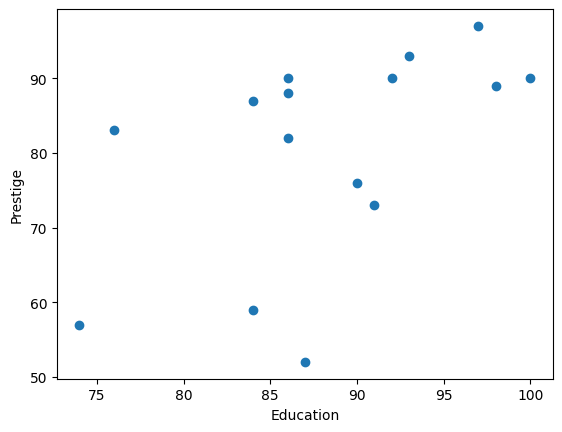

In [6]:
# plot `prestige` as a function of `education`
plt.scatter(education, prestige)
plt.xlabel('Education')
plt.ylabel('Prestige');

Each point on this scatterplot represents one occupation: the x and y coordinates
of the point are given by that occupation's `education` score and `prestige` score.

We will call the sequence of 15 `education` scores the `education`
*vector*.  A vector is a sequence of values — in this case, the sequence of 15
`education` scores, one for each occupation.  In Numpy terms, a vector is a one-dimensional array.  Similarly, we have a `prestige`
vector of 15 values.

You can think of "vector" as a mathematical term - we can represent a vector in
python in various ways. In the dataframe above, each vector is represented as a pandas column,
but when we stored them as separate variables, we represented each vector as a numpy array.

In [7]:
# the education vector
education

array([ 86,  76,  92,  90,  86,  84,  93, 100,  87,  86,  74,  98,  97,
        84,  91])

In [8]:
# the prestige vector 
prestige

array([82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73])

In [9]:
# both vectors in the dataframe
df[['education', 'prestige']]

,education,prestige
0,86,82
1,76,83
2,92,90
3,90,76
4,86,90
5,84,87
6,93,93
7,100,90
8,87,52
9,86,88


## Predictors, outcomes - x, y, slope and intercept

Typically in regression modelling we treat one variable as the
*outcome variable* - which means we ask how it changes *as a function of* 
the other variable(s) in the dataset. Just to clarify, "changes" here refers to
comparisons between different observational units. In the current dataset
our observational units are occupations. For example, we might use `prestige` as our outcome variable, and ask how it changes *as a function of* the `education` scores. 

*Predictor variables* are variables with which we seek to explain patterns
in the outcome variable. In the present case we are treating `education` as
our predictor variable. We are asking how `prestige` (our outcome variable* varies as a function of `education` (our predictor variable).  We might suspect,
for instance, that occupations scoring higher on `education` are more prestigious.

The three graphs below illustrate this concept, in the
context of linear regression, using some simulated data. You can think
of this as showing you some potential ways the relationship between our 
predictor (`education`) and our outcome (`prestige`) *could* look:

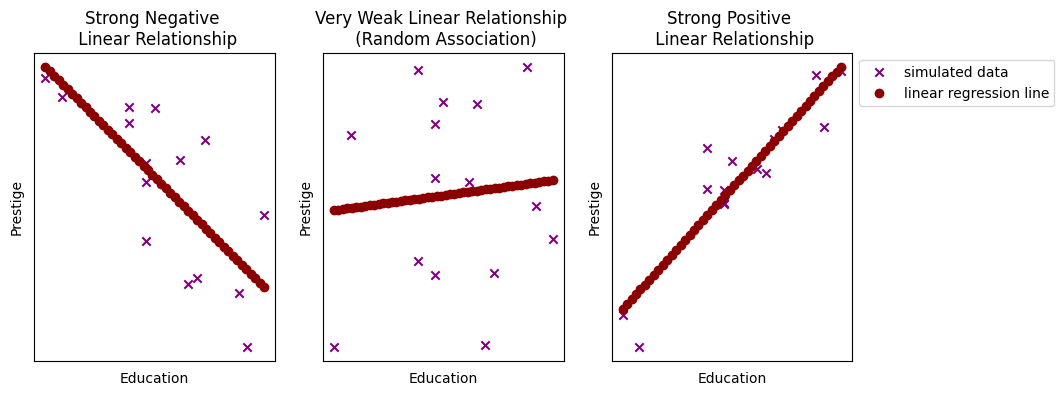

In [10]:
# do not worry about this code, it just generates the illustration below
rng = np.random.default_rng(seed=10)  # Make random numbers predictable.
plt.figure(figsize = (18,4))

plt.subplot(1,5, 2)
y_strong_neg = -0.6 * education + rng.normal(0, 5, size = len(education))
plt.scatter(education, y_strong_neg, marker = "x", color = "purple", label = 'simulated data')
lin1 = sps.linregress(education, y_strong_neg)
education_x = np.linspace(education.min(), education.max(), 50)
plt.scatter(education_x, lin1.intercept + lin1.slope *education_x, color = 'darkred')
plt.xticks([])
plt.yticks([])
plt.xlabel("Education")
plt.ylabel("Prestige")
plt.title('Strong Negative \n Linear Relationship')

plt.subplot(1,5, 3)
y_rand = rng.normal(0, 5, size = len(education))
plt.scatter(education, y_rand, marker = "x", color = "purple", label = 'simulated data')
lin2 = sps.linregress(education, y_rand)
plt.scatter(education_x, lin2.intercept + lin2.slope *education_x, color = 'darkred')
plt.xticks([])
plt.yticks([])
plt.xlabel("Education")
plt.ylabel("Prestige")
plt.title('Very Weak Linear Relationship \n (Random Association)')

plt.subplot(1,5, 4)
y_strong_pos = education + rng.normal(0, 5, size = len(education))
plt.scatter(education, y_strong_pos, marker = "x", color = "purple", label = 'simulated data' )
lin3 = sps.linregress(education, y_strong_pos)
plt.scatter(education_x, lin3.intercept + lin3.slope *education_x, color = 'darkred', label = "linear regression line")
plt.xticks([])
plt.yticks([])
plt.xlabel("Education")
plt.ylabel("Prestige")
plt.title('Strong Positive \n Linear Relationship')

plt.legend(bbox_to_anchor = (1, 1));

On each graph, the predictor variable (`education`) is on the x-axis, and the linear regression line (in dark red) summarizes how the outcome variable (`prestige`, on the y-axis) changes as a function of the predictor variable.

If the relationship between the predictor variable and the outcome variable is *strong*,
then the values of the outcome variable change a lot between low and high values of the predictor variable.
In this case the linear regression line will be *steep*.

If the relationship between the predictor variable and the outcome variable is *weak*,
then the values of the outcome variable are very similar between low and high values of the predictor variable.
In this case the linear regression line will be *flat*. E.g. the scores on the predictor variable, do
not give you much information about the scores on the outcome variable. High scores on the predictor variable
are equally likely to co-occur with high or low scores on the outcome variable.

We are calling the `education` vector a *predictor variable*, but other names for a
predicting vector are *regressor*, *covariate*, *explanatory variable*,
*independent variable*, *exogenous variable*, *feature* or `x` variable. (They all mean the same thing,
and people from different disciplines typically use different terms, depending
on the conventions of their discipline, so it's important to be aware of the
different terminology). 

We are calling the `prestige` vector an *outcome variable* but other terms we could use
include *predicted variable*, *response variable*, *regressand*, *dependent variable*, *endogenous
variable* or the `y` variable. (Again, people from different disciplines typically use different terms,
but they mean the same thing).

We can use the mathematical notation $\vec{x}$ to refer to a predicting vector.  The arrow over
the top of $\vec{x}$ reminds us that $\vec{x}$ refers to a vector (array, sequence)
of values, rather than a single value.

We can use the mathematical notation $\vec{y}$ to refer
to an outcome vector (which, again is a  vector (array, sequence) of values, rather than a single value).

Earlier we said we were plotting `prestige` *as a function of* `education`. Linear regression
involves a more specific version of this concept. When we use linear regression, we
are modelling our outcome vector $\vec{y}$ *as a **linear** function of* our predictor vector $\vec{x}$.  Linear means that we will predict our $\vec{y}$ variables with a straight line and our $\vec{x}$ values.

So if we use linear regression, with `education` as our predictor variable, and `prestige`
as our outcome variable, then we are modelling `prestige` *as a **linear** function of* `education`. 

Remember, we can define any straight line with a slope - call this $b$ - and an intercept - call this $c$.

We can express the idea of straight-line (linear) prediction in vector notation with:

$ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $

Read this as "the $y$ vector is a linear function of the $x$ vector plus the intercept ($c$) and the error vector $\vec{\varepsilon}$".

For this formula, $\vec{y} = b \vec{x} + \text{c}$ is called the *systematic component* - it
describes the linear relationship between $\vec{x}$ and $\vec{y}$. $b$ is a single value
(called the *slope*) which describes the strength of the relationship - because high values for $b$ mean a steep slope. The values in the predictor vector
$\vec{x}$ are multiplied by $b$ - if the linear relationship between $\vec{x}$ and $\vec{y}$ 
is *strong* then the value of $b$ will be *large*; if the linear relationship between $\vec{x}$ and $\vec{y}$ 
is *weak* then the value of $b$ will be *small*. 

*Note*: $b \vec{x} $ is read as "$b$ multiplied by $\vec{x}$". By convention, we don't 
normally write the multiplication symbol (we assume that if no other symbol is there,
then the values / vectors should be multiplied). But if we did want to write the multiplication explicitly, we could write $b * \vec{x} $.

The intercept $c$ (also called the *constant*) allows the line we fit to be more flexible than
it would be if we don't include an intercept. Essentially, without an intercept in the model, then
any line we fit has to run through the origin (the point at $x = 0, y = 0$), which is very
restrictive - without the intercept we can only fit a small subset of the possible lines which exist - and
these may not fit the data we have very well. Have a look at [this page](https://uob-ds.github.io/cfd2021/mean-slopes/Lines_Slopes_and_Intercepts_-_Refresher.html) for more about the intercept and the origin.

The error vector $\vec{\varepsilon}$ describes the "noise" in the data - residual variation which 
is not explained by the systematic component. A good way to think of it is this: the systematic component
describes the line which best fits the data. Unless the model is perfect, the datapoints themselves are very unlikely to
fall perfectly on this line - the error vector contains the distance that each point is from the
best-fitting line. Resultantly, the error vector will contain the same number of values as the
predictor vector and the outcome vector (in this case, 15 values). (This concept is much easier to
appreciate graphically, as we will see in a moment).

Remember, in this case $\vec{x}$ is our `education` vector (predictor), and $\vec{y}$ is our `prestige` vector (outcome). Just to emphasise that $\vec{x}$ and $\vec{y}$ contain our data, the code cell below uses some fancy printing functions to show you the equations above, but will show our actual data values in $\vec{x}$ and $\vec{y}$, in place of the symbols. This means that the actual values within the `education` vector and the `prestige` vector are shown, alongside the notation for the $b$ value, the intercept $c$, and the error vector $\vec{\varepsilon}$:

In [11]:
# do not worry about this code, it just prints the mathematical notation below this cell
jupyprint("Here is the our model ($ \\vec{y} = b \\vec{x} + \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `education` and `prestige` vectors:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(education).T)} + c +" +" \\vec{\\varepsilon}$")

Here is the our model ($ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $), showing the actual values within the `education` and `prestige` vectors:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = b * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + c + \vec{\varepsilon}$

Just to convince you that these values are from the `education` vector and the `prestige`
vector, here are both vectors, in their numpy array form (have a look at the values,
and compare these to the values in the vectors shown in the mathematical notation above this cell):

In [12]:
# the prestige vector (again)
prestige

array([82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73])

In [13]:
# the education vector (again)
education

array([ 86,  76,  92,  90,  86,  84,  93, 100,  87,  86,  74,  98,  97,
        84,  91])

So just to recap, our linear regression model can be expressed in vector notation as:

$ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $

Where:

$\vec{y}$ is our outcome vector, in this case `prestige`


$\vec{x}$ is our predictor vector, in this case `education`

If we wish, we can write the model equation using the names of our vectors rather than the vector notation:

`prestige` $ = b $ `education` $+$ $  \text{c} + \vec{\varepsilon} $

$b$ is a value (called the "slope") which summarizes the strength of the (linear) predictive relationship between our predictor vector and our outcome vector. Each value in the predictor vector gets *multiplied* by $b$

$\text{c}$ is the intercept, which gives a greater flexibility in the lines we can fit (it means they do not have to pass through the origin, which would really limit our modelling ability)

$\vec{\varepsilon}$ is the error vector, which contains the distance between each datapoint and the line of best fit

The talk of "predictve relationships" and "error" all might sound somewhat abstract, so let's explore
what the terms mean graphically.

The cell below defines a function which generates some simulated `prestige` scores. It
does this by letting you set the value of $b$ and control the size of the errors in the error vector $\vec{\varepsilon}$. This lets you "play god" and control the strength of the predictive relationship between `education` and `prestige`, as well as  the amount of error (or "noise") in the data. Run the cell to define the function:

In [14]:
# do not worry about the details of this function, it is just to generate the illustrative plot
def linear_data_generator(b_value, error_size):
    """Generate simulated data with a linear relationship."""

    # the education values as the x values
    x = education
    
    # generate the error vector
    e = rng.normal(0, error_size, size = len(x))

    # generate the y vector
    y = b_value*x + e

    # plot the simulated data
    plt.scatter(x, y, color = 'purple', marker = 'x', label = "Simulated Data")
    plt.xlabel("Education")
    plt.ylabel("Simulated Prestige Values")
    plt.title(f'b_value = {b_value},\n error_size = {error_size}')
    plt.legend()

If you are using this page interactively, then try varying the values of $b$ and
$\varepsilon$ (which in the code are called `b_value` and `error_size`), 
to see what effect they have.

Initially, we have set `error_size` to equal 0. This means there is no
noise in the data, and the relationship between $\vec{x}$ and $\vec{y}$
is perfectly described by $b$. You can see that this means the points
fall perfectly on a straight line:

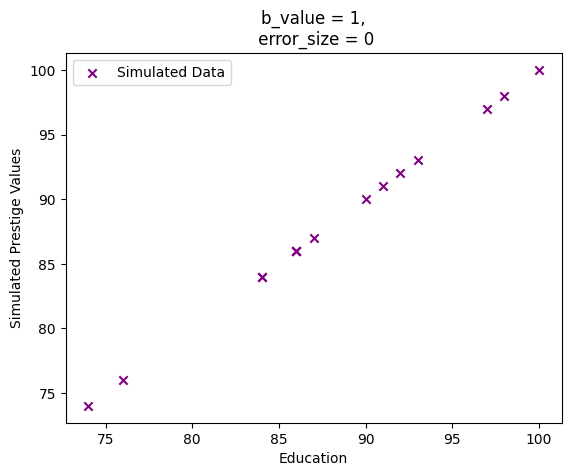

In [15]:
# generate some simulated data to investigate the effect of the b value
# and smaller/larger error values
linear_data_generator(b_value = 1, error_size = 0)

We would almost never observe such a perfect predictive relationship in real life.
It would mean that all of the variation in the outcome variable would be perfectly captured
by the systematic component ($\vec{y} = b \vec{x} + \text{c} $) if we  were to fit a linear
regression model to the data.

We can see that if we make the error term larger, as in the cell below, then the points
are now spread much more randomly:

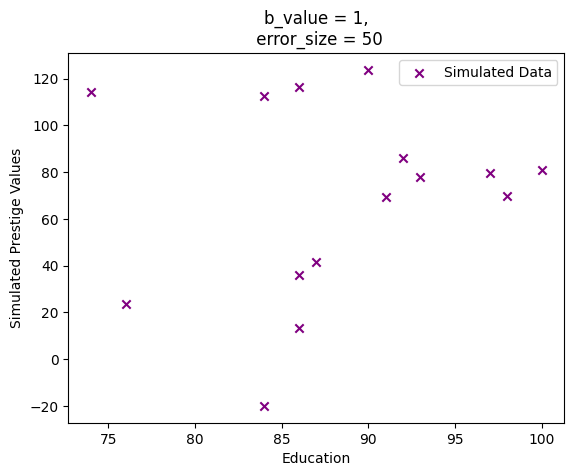

In [16]:
# generate some more simulated data to investigate the effect of the b value
# and smaller/larger error values
linear_data_generator(b_value = 1, error_size = 50)

*Note: these plots are just to illustrate the effect of the $b$ value and the concept
of errors. Negative prestige scores are not possible, in the actual data.*

As mentioned above, you can think of $b$ as describing the strength of the systematic, linear
relationship between $\vec{x}$ and $\vec{y}$. And you can think of $\vec{\varepsilon}$
as describing the variation left in the data that is not accounted for by
$b$.

The task of linear regression is to find the values of $b$ and $c$ which give the
best summary of the linear predictive relationship between our predictor variable
and our outcome variable. "Best" here is judged by finding the smallest sum of the
squared error values (i.e. the values in the error vector $\vec{\varepsilon}$).

Let's perform a linear regression on Duncan's occupational prestige data, to show
the concepts behind the notation we've just outlined.

Just to remind us, let's give the name `x` to the array (vector) of predicting `education` values ($\vec{x}$):

In [17]:
x = education

Let's give the name `y` to our outcome vector ($\vec{y}$, the `prestige` vector):

In [18]:
y = prestige

We want to calculate the best (minimal sum of the squared errors) line that relates
the `education` (`x`) scores to the `prestige` (`y`) scores.

We could use `scipy.optimize.minimize` for this, but here we will  quickly fit a linear regression model to these vectors using the `linregress` function
from the `scipy.stats` package:

In [19]:
# fit a linear regression model, using scipy
res = sps.linregress(x, y)
res

LinregressResult(slope=1.0058545962950014, intercept=-8.383432366305456, rvalue=0.5267822840376757, pvalue=0.04363617869770525, stderr=0.4501439537539412, intercept_stderr=39.8621893783399)

Let's call the slope of the line `b` and the intercept `c` (C for Constant).

In [20]:
# store the slope (b) and the intercept (c) as separate variables
b = res.slope
c = res.intercept

In [21]:
# show the value of b, from the Duncan data
b

1.0058545962950014

In [22]:
# show the value of the intercept, from the Duncan data
c

-8.383432366305456

These values (of $b$ and $c$) are called the *parameter estimates* of our linear regression model. To recap, the *slope* $b$ describes the strength and direction of the linear predictive relationship between `education` and `prestige`, and the *intercept* $c$ describes  where our linear regression line crosses the y axis (as mentioned above, including the intercept lets us model a greater variety of linear trends).

$b$ can be interpreted as the expected change in `prestige` if we compared two observational units which
differed only by 1 point of `education`.

So, based on the linear relationship in the data, if the scores of two occupations differ by 1 point of `education`, we would expect the difference in their `prestige` scores to be 1.006 points. ("Points" is a generic term, the meaning in this context is shown below):

`education` - percentage of census respondents in the occupation who were high school graduates (each "point" is a percentage point)

`prestige` - percentage of respondents in the NORC survey who rated the occupation as “good” or better in prestige (each "point" is a percentage point)

## Fitted values and errors

Obtaining the parameter estimates is called *fitting* a regression model. The parameter estimates then give us *fitted values*. There are a few ways to think about the fitted values. The fitted values are the values generated
by the systematic component of our model ($\vec{y} = b \vec{x} + \text{c}$). As such they all fall on a straight line,
and give us a summary of the linear trend in the data. You can think of them as our summary of the linear trend, when
we ignore the noise in the actual data. Again, these concepts are easier to understand graphically. The graph below shows the original data (in blue) alongside the fitted values (in red):

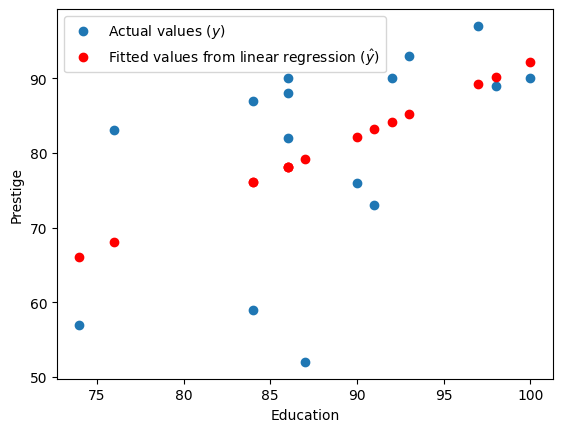

In [23]:
# do not worry about this code, it is just a convenience function to plot the data
def make_scatter(with_errors = False, show = False):
    plt.scatter(x, y, label='Actual values ($y$)')
    # plot the predicted values
    fitted = b * x + c
    plt.plot(x, fitted, 'ro', label='Fitted values from linear regression ($\hat{y}$)')
    if with_errors == True:
        # plot the distance between predicted and actual, for all points.
        n = len(x)
        for i in range(n):
            plt.plot([x[i], x[i]], [fitted[i], y[i]], 'k:')
        # the following code line is just to trick Matplotlib into making a new
        # a single legend entry for the dotted lines.
        plt.plot([], [], 'k:', label='Errors ($ \\varepsilon $)')
    plt.xlabel('Education')
    plt.ylabel('Prestige')
    # show the legend
    plt.legend();
    if show == True:
        plt.show()
# generate the plot    
make_scatter()

Remember, our *fitted* values are given by multiplying the `x`
(`education`) values by `b` (the slope) and then adding `c` (the intercept).  In
Numpy that looks like this:

In [24]:
fitted = b * x + c
fitted

array([78.120063, 68.061517, 84.15519 , 82.143481, 78.120063, 76.108354,
       85.161045, 92.202027, 79.125918, 78.120063, 66.049808, 90.190318,
       89.184463, 76.108354, 83.149336])

Typically, we use the "hat" notation to refer to the fitted values. So the
vector of fitted values we would denote with $\vec{\hat{y}}$. The $\hat{ }$ over the $y$
is called the "hat". 

Because our fitted values give us a summary of the linear predictive relationship
between $\vec{x}$ and $\vec{y}$, minus the noise/randomness in the actual data, we
can write the equation for the fitted values as:

$\vec{\hat{y}} = b \vec{x} + \text{c}$

This is the same as the equation for our full model, but without the error vector $\vec{\varepsilon}$:

$ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $

The *errors* are the differences between the *fitted* and *actual* (`y`) values:

In [25]:
errors = y - fitted
errors

array([  3.879937,  14.938483,   5.84481 ,  -6.143481,  11.879937,
        10.891646,   7.838955,  -2.202027, -27.125918,   9.879937,
        -9.049808,  -1.190318,   7.815537, -17.108354, -10.149336])

The dashed lines in the plot below represent the *errors*.  The values in the `errors` vector
above represent the (positive and negative) lengths of these dashed lines.

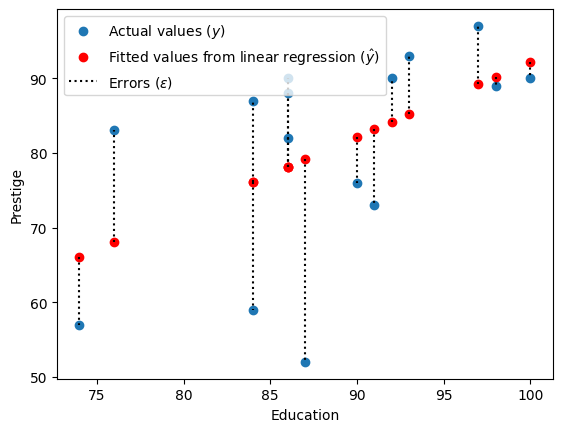

In [26]:
# plot the data and fitted values (showing the errors)
make_scatter(with_errors = True)

"Fitting" a linear regression involves finding the parameter estimates (values of $b$ and $c$) which give fitted values that yield the smallest sum of the squared error values.  The error values are the values in $\vec{\varepsilon}$, or, equivalently, the black dashed lines on the graph above).

Now is a good opportunity to pause, and compare the mathematical notation for the linear regression model
with the graph above, to make sure you can relate the two perspectives (the mathematical perspective and
the graphical perspective):

Here is the equation for the fitted values (these are the red points on the graph above):

$\vec{\hat{y}} = b \vec{x} + \text{c}$

And here is the equation for the full model (these are the blue points on the graph above):

$ \vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $

## Mathematical notation

Our next step is to write the values in $\vec{x}$ and $\vec{y}$ more generally and more formally in
mathematical symbols, so we can think about *any* vector (sequence) of x values
$\vec{x}$, and any sequence (vector) of matching y values $\vec{y}$.  But to start
with, let's think about the actual set of values we have for $\vec{x}$.  We could
write the actual values in mathematical notation as:

In [27]:
# do not worry about this code, it just generates the notation below
jupyprint("$ \\vec{x} = " + arraytex(np.atleast_2d(x).T)+"$" )

$ \vec{x} = \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix}$

In [28]:
# show the education vector, for comparison to the notation above
education

array([ 86,  76,  92,  90,  86,  84,  93, 100,  87,  86,  74,  98,  97,
        84,  91])

This means that $\vec{x}$ is a sequence of these specific 15 values.  But we
could write $\vec{x}$ in a more general way, to be *any* 15 values, like this:

In [29]:
# do not worry about this code, it just generates the notation below
n = len(df)
indices = np.arange(1, n + 1)
x_is = np.array([f'$x_{{{i}}}$' for i in indices])
jupyprint("$ \\vec{x} = " + arraytex(np.atleast_2d(x_is).T, quote_strings = False, contains_latex=True)+"$" )

$ \vec{x} = \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix}$

This means that $\vec{x}$ consists of 15 numbers, $x_1, x_2 ..., x_{15}$, where
$x_1$ can be any number, $x_2$ can be any number, and so on.

$x_1$ is the value for the first occupation, $x_2$ is the value for the second occupation, etc.

Here's another way of looking at the relationship of the values in our
particular case, and their notation:

In [30]:
# do not worry about this code, it just generates the dataframe below
df_index = pd.Index(indices, name='1-based index')
x_notation = pd.DataFrame(
    {r'$\vec{x}$ values': x,
     f'$x$ value notation': 
     [f'${v}$' for v in x_is]
    },
    index=df_index
)
x_notation 

,$\vec{x}$ values,$x$ value notation
1-based index,,
1,86,$$x_{1}$$
2,76,$$x_{2}$$
3,92,$$x_{3}$$
4,90,$$x_{4}$$
5,86,$$x_{5}$$
6,84,$$x_{6}$$
7,93,$$x_{7}$$
8,100,$$x_{8}$$
9,87,$$x_{9}$$


You can see that the values in the "$\vec{x}$ values" column, are the 
values in our predictor vector `education`:

In [31]:
# show the education values
education

array([ 86,  76,  92,  90,  86,  84,  93, 100,  87,  86,  74,  98,  97,
        84,  91])

The values in the "$x$ value notation" column show the general vector
notation for these values (this notation applies to other $\vec{x}$ vectors
as well e.g. those from other datasets).

We can make $\vec{x}$ be even more general, by writing it like this:

$$
\vec{x} = \begin{bmatrix}
           x_{1} \\
           x_{2} \\
           \vdots \\
           x_{n}
         \end{bmatrix}
$$

This means that $\vec{x}$ is a sequence of any $n$ numbers, where $n$ can be any
whole number, such as 1, 2, 3 ...  

$n$ is the total number of datapoints,
in our specific case, $n = 15$, because we have 15 datapoints. 

(This looks more
complex than it is, the small numbers to the bottom right of the symbols (1, 2, 3 ... $n$)
essentially just count the number of datapoints - these counters are called *subscripts*).

Similarly, for our `prestige` ($\vec{y}$) values, we can write:

In [32]:
# do not worry about this code, it just generates the notation below
jupyprint("$ \\vec{y} = " + arraytex(np.atleast_2d(y).T)+"$" )

$ \vec{y} = \begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix}$

In [33]:
# show the prestige vector, for comparison to the notation above
prestige

array([82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73])

In [34]:
# do not worry about this code, it just generates the dataframe below
y_notation = pd.DataFrame(
    {r'$\vec{y}$ values': y,
     f'$y$ value notation': [f'$y_{{{i}}}$' for i in indices]
    }, index=df_index)
y_notation

,$\vec{y}$ values,$y$ value notation
1-based index,,
1,82,$y_{1}$
2,83,$y_{2}$
3,90,$y_{3}$
4,76,$y_{4}$
5,90,$y_{5}$
6,87,$y_{6}$
7,93,$y_{7}$
8,90,$y_{8}$
9,52,$y_{9}$


Again, you can see that the values in the "$\vec{y}$ values" column, are the 
values in our outcome vector `prestige`:

In [35]:
# show the prestige vector
prestige

array([82, 83, 90, 76, 90, 87, 93, 90, 52, 88, 57, 89, 97, 59, 73])

Again, the values in the "$y$ value notation" column show the general vector
notation for these values (this notation applies to other $\vec{y}$ vectors
as well).

More generally we can write $\vec{y}$ as a vector of any $n$ numbers:

$$
\vec{y} = \begin{bmatrix}
           y_{1} \\
           y_{2} \\
           \vdots \\
           y_{n}
         \end{bmatrix}
$$

## Notation for fitted values

If we have $n$ values in $\vec{x}$ and $\vec{y}$ then we have $n$ *fitted* values.

In our case we have 15 values ($n = 15$) in $\vec{x}$ and $\vec{y}$, so we have 15 *fitted* values.

We write the fitted value for the first occupation as $\hat{y}_1$, that for the
second as $\hat{y}_2$, and so on:

$$
\vec{\hat{y}} = \begin{bmatrix}
           \hat{y}_{1} \\
           \hat{y}_{2} \\
           \vdots \\
           \hat{y}_{n}
         \end{bmatrix}
$$

You can read the $\hat{ }$ over the $y$ as "fitted", so $\hat{y}_1$ is our
fitted value for $y_1$. Remember, the fitted values are generated from the
parameter estimates which minimize the sum of the squared error.

Our regression model says each fitted value comes about by multiplying the
corresponding $x$ value by $b$ (the slope) and then adding $c$ (the intercept).

So, the fitted values are:

$$
\hat{y}_1 = b x_1 + c \\
\hat{y}_2 = b x_2 + c \\
... \\
\hat{y}_n = b x_n + c
$$

More compactly:

$$
\vec{\hat{y}}  = \begin{bmatrix}
           b x_1 + c \\
           b x_2 + c \\
           \vdots \\
           b x_n + c
         \end{bmatrix}
$$

We often use $i$ as a general *index* into the vectors.  So, instead of
writing:

$$
\hat{y}_1 = b x_1 + c \\
\hat{y}_2 = b x_2 + c \\
... \\
\hat{y}_n = b x_n + c
$$

we use $i$ to mean any whole number from 1 through $n$, and so:

$$
\hat{y}_i = b x_i + c \\
\text{for } i \in [ 1, 2, ... n]
$$

For the second line above, read $\in$ as "in", and the whole line as "For $i$
in 1 through $n$", or as "Where $i$ can take any value from 1 through $n$
inclusive". (Remember, $n$ is the total number of observational units in our dataset).

We mean here, that for any whole number $i$ from 1 through $n$, the fitted
value $\hat{y}_i$ (e.g. $\hat{y}_3$, where $i=3$) is given by $b$ times the
corresponding $x$ value ($x_3$ where $i=3$) plus $c$.

The error vector $\vec{\varepsilon}$ is:

$$
\vec{\varepsilon}=
\begin{bmatrix}
           \varepsilon_1 \\
           \varepsilon_2 \\
           \vdots \\
           \varepsilon_n
         \end{bmatrix}
$$

For our linear model, the errors are:

$$
\vec{\varepsilon}= \begin{bmatrix}
           y_1 - \hat{y}_1 \\
           y_2 - \hat{y}_2 \\
           \vdots \\
           y_n - \hat{y}_n
         \end{bmatrix}         = 
         \begin{bmatrix}
           y_1 - (b x_1 + c)\\
           y_2 - (b x_2 + c) \\
           \vdots \\
           y_n - (b x_n + c)
         \end{bmatrix}         
$$

Again, we could write this same idea with the general index $i$ as:

$$
\varepsilon_i = y_i - (b x_i + c)
$$

Putting all of this together, we can express the formula for our linear regression model ($\vec{y} = b \vec{x} + \text{c} + \vec{\varepsilon} $) using the generalized mathematical form of the vectors as:

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b * \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

And the formula for our fitted values ($\hat{y}_i = b x_i + c$) can be expressed using the generalized mathematical form of the vectors as:

$\begin{bmatrix}{} \text{$\hat{y_{1}}$} \\ \text{$\hat{y_{2}}$} \\ \text{$\hat{y_{3}}$} \\ \text{$\hat{y_{4}}$} \\ \text{$\hat{y_{5}}$} \\ \text{$\hat{y_{6}}$} \\ \text{$\hat{y_{7}}$} \\ \text{$\hat{y_{8}}$} \\ \text{$\hat{y_{9}}$} \\ \text{$\hat{y_{10}}$} \\ \text{$\hat{y_{11}}$} \\ \text{$\hat{y_{12}}$} \\ \text{$\hat{y_{13}}$} \\ \text{$\hat{y_{14}}$} \\ \text{$\hat{y_{15}}$} \\ \end{bmatrix} = b * \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix} + c$

Again, here is a good point to pause to check you can relate the mathematical notation perspective to the graphical perspective, which is shown again below:

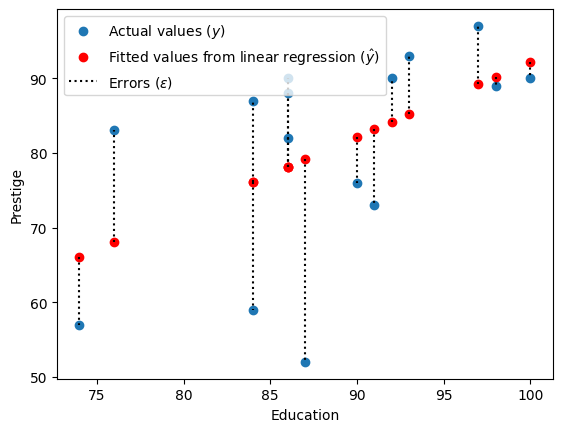

In [36]:
make_scatter(with_errors = True)

## Approximation and errors

Our straight line model says that the $y_i$ values are approximately predicted
by the fitted values $\hat{y}_i = b x_i + c$.

$$
y_i \approx bx_i + c
$$

Read $\approx$ above as *approximately equal to*.

With the $\approx$, we are accepting that we will not succeed in explaining our
prestige values exactly. We can rephrase this by saying that each
observation is equal to the predicted value (from the formula above) plus the
remaining error for each observation:

$$
y_i = bx_i + c + \varepsilon_i
$$

Of course this must be true for our calculated errors because we calculated
them with:

$$
\varepsilon_i = y_i - (b x_i + c)
$$

In [37]:
assert np.allclose(y, b * x + c + errors)

# Putting it all together

On this page, we have introduced the mathematical notation for linear regression models. We have
spoken about the key purposes of (linear) regression models (description and prediction).
We have performed a linear regression on Duncan's occupational prestige data. We modelled `prestige`
as a linear function of `education` - our observational units were occupations.

The cell below will print out a walkthrough of everything we have done on this page.
It will shown the mathematical notation, and then will show the values within our
vectors, and the values of our parameter estimates, in place of the symbols, within the same notation.

*Note*: here we will write the multiplication symbol ($*$) for clarity, but you will see that most writers 
omit the multiplicaton sign in the mathematical notation.

Here is the mathematical notation for our linear regression model:

$ \vec{y} = b * \vec{x} + \text{c} + \vec{\varepsilon} $

The full model, showing the general form of the vectors (i.e. not specific to this dataset), can be written as:

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b * \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

$\vec{x}$ is our `education` vector:

`education` = $ \vec{x} = \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix}$

$\vec{y}$ is our `prestige` vector:

`prestige` = $ \vec{y} = \begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix}$

Here is our model ($ \vec{y} = b * \vec{x} + \text{c} + \vec{\varepsilon} $), showing the actual values within the `education` vector and the `prestige` vector:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = b * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

We used linear regression to obtain the values of $b$ and $c$ which minimize the sum of the squared error values (i.e. the values in the error vector $\vec{\varepsilon}$):

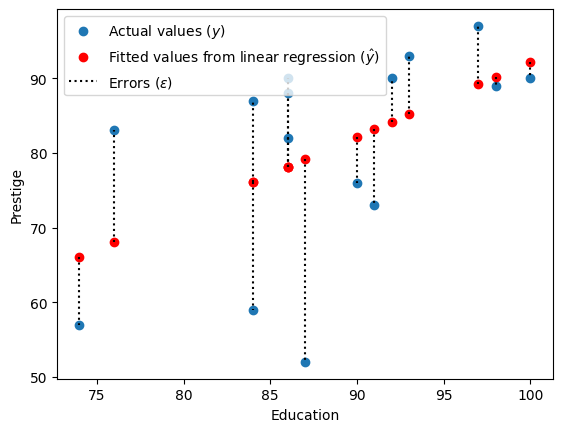

This gave us the parameter estimates 
$b$ = 1.006 and 
$c$ = -8.383

These parameter estimates give us our fitted values. Here is the compact equation for our fitted values $\hat{y}$:

$\vec{\hat{y}} = b * \vec{x} + \text{c}$

And here is the vector form of the same general equation:

$\begin{bmatrix}{} \hat{y_{1}} \\ \hat{y_{2}} \\ \hat{y_{3}} \\ \hat{y_{4}} \\ \hat{y_{5}} \\ \hat{y_{6}} \\ \hat{y_{7}} \\ \hat{y_{8}} \\ \hat{y_{9}} \\ \hat{y_{10}} \\ \hat{y_{11}} \\ \hat{y_{12}} \\ \hat{y_{13}} \\ \hat{y_{14}} \\ \hat{y_{15}} \\ \end{bmatrix} = b * \begin{bmatrix}{} x_{1} \\ x_{2} \\ x_{3} \\ x_{4} \\ x_{5} \\ x_{6} \\ x_{7} \\ x_{8} \\ x_{9} \\ x_{10} \\ x_{11} \\ x_{12} \\ x_{13}\\ x_{14} \\ x_{15} \\ \end{bmatrix} + c$

Here is the same compact equation for the fitted values $\hat{y}$, with our actual parameter estimates shown, in place of their symbols:

$\vec{\hat{y}} =$ 1.006 * $\vec{x}$ $+$  -8.383

Here is the same equation, with our parameter estimates shown AND the values within each vector shown:

$\begin{bmatrix}{} 78.12 \\ 68.06 \\ 84.16 \\ 82.14 \\ 78.12 \\ 76.11 \\ 85.16 \\ 92.2 \\ 79.13 \\ 78.12 \\ 66.05 \\ 90.19 \\ 89.18 \\ 76.11 \\ 83.15 \\ \end{bmatrix} = 1.006 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + -8.383$

The error vector $\vec{\varepsilon}$ is our actual $y$ values minus our fitted $\hat{y}$ values. Here is the general, compact form of the equation for the error vector:

$\vec{\varepsilon} = \vec{y} - \vec{\hat{y}} $

And here is the general form of the same equation, showing the general vectors:

$\begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix} = \begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} - \begin{bmatrix}{} \hat{y_{1}} \\ \hat{y_{2}} \\ \hat{y_{3}} \\ \hat{y_{4}} \\ \hat{y_{5}} \\ \hat{y_{6}} \\ \hat{y_{7}} \\ \hat{y_{8}} \\ \hat{y_{9}} \\ \hat{y_{10}} \\ \hat{y_{11}} \\ \hat{y_{12}} \\ \hat{y_{13}} \\ \hat{y_{14}} \\ \hat{y_{15}} \\ \end{bmatrix}$

Which with our actual data and fitted values is:

$ \begin{bmatrix}{} 3.88 \\ 14.94 \\ 5.84 \\ -6.14 \\ 11.88 \\ 10.89 \\ 7.84 \\ -2.2 \\ -27.13 \\ 9.88 \\ -9.05 \\ -1.19 \\ 7.82 \\ -17.11 \\ -10.15 \\ \end{bmatrix} = \begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} - \begin{bmatrix}{} 78.12 \\ 68.062 \\ 84.155 \\ 82.143 \\ 78.12 \\ 76.108 \\ 85.161 \\ 92.202 \\ 79.126 \\ 78.12 \\ 66.05 \\ 90.19 \\ 89.184 \\ 76.108 \\ 83.149 \\ \end{bmatrix} $

So our full model ($ \vec{y} = b * \vec{x} + \text{c} + \vec{\varepsilon} $), showing all values within all the vectors is:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = b * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + c + \begin{bmatrix}{} 3.88 \\ 14.938 \\ 5.845 \\ -6.143 \\ 11.88 \\ 10.892 \\ 7.839 \\ -2.202 \\ -27.126 \\ 9.88 \\ -9.05 \\ -1.19 \\ 7.816 \\ -17.108 \\ -10.149 \\ \end{bmatrix}$

You can see that this conforms with the general mathematical notation:

$\begin{bmatrix}{} \text{$y_{1}$} \\ \text{$y_{2}$} \\ \text{$y_{3}$} \\ \text{$y_{4}$} \\ \text{$y_{5}$} \\ \text{$y_{6}$} \\ \text{$y_{7}$} \\ \text{$y_{8}$} \\ \text{$y_{9}$} \\ \text{$y_{10}$} \\ \text{$y_{11}$} \\ \text{$y_{12}$} \\ \text{$y_{13}$} \\ \text{$y_{14}$} \\ \text{$y_{15}$} \\ \end{bmatrix} = b * \begin{bmatrix}{} \text{$x_{1}$} \\ \text{$x_{2}$} \\ \text{$x_{3}$} \\ \text{$x_{4}$} \\ \text{$x_{5}$} \\ \text{$x_{6}$} \\ \text{$x_{7}$} \\ \text{$x_{8}$} \\ \text{$x_{9}$} \\ \text{$x_{10}$} \\ \text{$x_{11}$} \\ \text{$x_{12}$} \\ \text{$x_{13}$} \\ \text{$x_{14}$} \\ \text{$x_{15}$} \\ \end{bmatrix} + c + \begin{bmatrix}{} \text{$\varepsilon_{1}$} \\ \text{$\varepsilon_{2}$} \\ \text{$\varepsilon_{3}$} \\ \text{$\varepsilon_{4}$} \\ \text{$\varepsilon_{5}$} \\ \text{$\varepsilon_{6}$} \\ \text{$\varepsilon_{7}$} \\ \text{$\varepsilon_{8}$} \\ \text{$\varepsilon_{9}$} \\ \text{$\varepsilon_{10}$} \\ \text{$\varepsilon_{11}$} \\ \text{$\varepsilon_{12}$} \\ \text{$\varepsilon_{13}$} \\ \text{$\varepsilon_{14}$} \\ \text{$\varepsilon_{15}$} \\ \end{bmatrix}$

And here is our full model, showing all values within all the vectors AND the values of our parameter estimates:

$\begin{bmatrix}{} 82 \\ 83 \\ 90 \\ 76 \\ 90 \\ 87 \\ 93 \\ 90 \\ 52 \\ 88 \\ 57 \\ 89 \\ 97 \\ 59 \\ 73 \\ \end{bmatrix} = 1.006 * \begin{bmatrix}{} 86 \\ 76 \\ 92 \\ 90 \\ 86 \\ 84 \\ 93 \\ 100 \\ 87 \\ 86 \\ 74 \\ 98 \\ 97 \\ 84 \\ 91 \\ \end{bmatrix} + -8.383 + \begin{bmatrix}{} 3.88 \\ 14.938 \\ 5.845 \\ -6.143 \\ 11.88 \\ 10.892 \\ 7.839 \\ -2.202 \\ -27.126 \\ 9.88 \\ -9.05 \\ -1.19 \\ 7.816 \\ -17.108 \\ -10.149 \\ \end{bmatrix}$

In [38]:
# do not worry about this (thorny!) code, it just generates the walkthrough below
jupyprint("Here is the mathematical notation for our linear regression model:")
jupyprint("$ \\vec{y} = b * \\vec{x} + \\text{c} + \\vec{\\varepsilon} $")
jupyprint("The full model, showing the general form of the vectors (i.e. not specific to this dataset), can be written as:")
x_string = f"{arraytex(np.atleast_2d(x_is).T, quote_strings = False, contains_latex=True)}"
y_is = np.array([f'$y_{{{i}}}$' for i in indices])
y_string = f"{arraytex(np.atleast_2d(y_is).T, quote_strings = False, contains_latex=True)}"
e_string = y_string.replace("y_", "\\varepsilon_")
jupyprint(f"${y_string} = b * {x_string} + c + {e_string}$")
jupyprint("$\\vec{x}$ is our `education` vector:")
jupyprint("`education` = $ \\vec{x} = " + arraytex(np.atleast_2d(education).T)+"$" )
jupyprint("$\\vec{y}$ is our `prestige` vector:")
jupyprint("`prestige` = $ \\vec{y} = " + arraytex(np.atleast_2d(prestige).T)+"$" )
jupyprint("Here is our model ($ \\vec{y} = b * \\vec{x} + \\text{c} + \\vec{\\varepsilon} $), showing the actual values within the `education` vector and the `prestige` vector:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(education).T)} + c +" +f" {e_string}$")
jupyprint("We used linear regression to obtain the values of $b$ and $c$ which minimize the sum of the squared error values (i.e. the values in the error vector $\\vec{\\varepsilon}$):")
make_scatter(with_errors=True, show=True)
jupyprint(f"This gave us the parameter estimates \n$b$ = {b.round(3)} and \n$c$ = {c.round(3)}")
jupyprint("These parameter estimates give us our fitted values. Here is the compact equation for our fitted values $\hat{y}$:")
jupyprint("$\\vec{\\hat{y}} = b * \\vec{x} + \\text{c}$")
jupyprint("And here is the vector form of the same general equation:")
jupyprint("$\\begin{bmatrix}{} \\hat{y_{1}} \\\\ \\hat{y_{2}} \\\\ \\hat{y_{3}} \\\\ \\hat{y_{4}} \\\\ \\hat{y_{5}} \\\\ \\hat{y_{6}} \\\\ \\hat{y_{7}} \\\\ \\hat{y_{8}} \\\\ \\hat{y_{9}} \\\\ \\hat{y_{10}} \\\\ \\hat{y_{11}} \\\\ \\hat{y_{12}} \\\\ \\hat{y_{13}} \\\\ \\hat{y_{14}} \\\\ \\hat{y_{15}} \\\\ \\end{bmatrix} = b * \\begin{bmatrix}{} x_{1} \\\\ x_{2} \\\\ x_{3} \\\\ x_{4} \\\\ x_{5} \\\\ x_{6} \\\\ x_{7} \\\\ x_{8} \\\\ x_{9} \\\\ x_{10} \\\\ x_{11} \\\\ x_{12} \\\\ x_{13}\\\\ x_{14} \\\\ x_{15} \\\\ \\end{bmatrix} + c$")
jupyprint("Here is the same compact equation for the fitted values $\hat{y}$, with our actual parameter estimates shown, in place of their symbols:")
jupyprint("$\\vec{\\hat{y}} =$"+f" {b.round(3)} " +"* $\\vec{x}$"+" $+$ "+f" {c.round(3)}")
jupyprint("Here is the same equation, with our parameter estimates shown AND the values within each vector shown:")
jupyprint(f"${arraytex(np.atleast_2d(fitted.round(2)).T)} = {b.round(3)} * {arraytex(np.atleast_2d(education).T)} + {c.round(3)}$")
jupyprint("The error vector $\\vec{\\varepsilon}$ is our actual $y$ values minus our fitted $\hat{y}$ values. Here is the general, compact form of the equation for the error vector:")
jupyprint("$\\vec{\\varepsilon} = \\vec{y} - \\vec{\\hat{y}} $")
jupyprint("And here is the general form of the same equation, showing the general vectors:")
hat_string = "\\begin{bmatrix}{} \\hat{y_{1}} \\\\ \\hat{y_{2}} \\\\ \\hat{y_{3}} \\\\ \\hat{y_{4}} \\\\ \\hat{y_{5}} \\\\ \\hat{y_{6}} \\\\ \\hat{y_{7}} \\\\ \\hat{y_{8}} \\\\ \\hat{y_{9}} \\\\ \\hat{y_{10}} \\\\ \\hat{y_{11}} \\\\ \\hat{y_{12}} \\\\ \\hat{y_{13}} \\\\ \\hat{y_{14}} \\\\ \\hat{y_{15}} \\\\ \\end{bmatrix}"
jupyprint(f"${e_string} = {y_string} - {hat_string}$")
jupyprint("Which with our actual data and fitted values is:")
jupyprint(f"$ {arraytex(np.atleast_2d(errors.round(2)).T)} = {arraytex(np.atleast_2d(prestige).T)} - {arraytex(np.atleast_2d(fitted.round(3)).T)} $")
jupyprint("So our full model ($ \\vec{y} = b * \\vec{x} + \\text{c} + \\vec{\\varepsilon} $), showing all values within all the vectors is:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = b * {arraytex(np.atleast_2d(education).T)} + c + {arraytex(np.atleast_2d(errors.round(3)).T)}$")
jupyprint(f"You can see that this conforms with the general mathematical notation:")
jupyprint(f"${y_string} = b * {x_string} + c + {e_string}$")
jupyprint("And here is our full model, showing all values within all the vectors AND the values of our parameter estimates:")
jupyprint(f"${arraytex(np.atleast_2d(prestige).T)} = {b.round(3)} * {arraytex(np.atleast_2d(education).T)} + {c.round(3)} + {arraytex(np.atleast_2d(errors.round(3)).T)}$")

Each component of the mathematical notation (for all these equations) can be represented in Python (this is one of the beautiful things about code).

In fact, the mathematical operations can just be thought of as a way of representing what is happening in the code (and vice versa).

We've seen this concept already, but just for further illustration, the cell below replicates the last equation shown immediately above this cell (e.g. the equation of the full model, showing the actual data in the vectors, and our parameter estimates). 

Compare the values from this calculation in Python to the values in the leftmost vector
(to the left of the equals sign) in the last equation shown above: 

In [39]:
# the equation above, in python
b * education + c + errors

array([82., 83., 90., 76., 90., 87., 93., 90., 52., 88., 57., 89., 97.,
       59., 73.])

This page was almost certainty challenging if this is the first time you have seen this notation (or you have encountered it previously, but have not seen it for a long time). 

Translating between the mathematical notation, Python operations and graphical representations of the vectors is the best way to understand the content of this page. If you feel you have not fully grasped any aspect of the page, then we suggest revisiting the content and translating between the perspectives (mathematical, code, graphical) - it can take time to internalise, but if you keep at it you will eventually understand it!

## References

```{bibliography} /bib/course_refs.bib
:filter: docname in docnames
```